<a href="https://colab.research.google.com/github/sanskruti-1234/Deep-Learning/blob/main/Practical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

In [3]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1/m) * (X.T @ errors)
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


In [4]:
def normal_equation(X, y):
    # np.linalg.pinv is the pseudo-inverse, which is more robust than a direct inverse.
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta

In [5]:
def main():
    """
    Main function to run the Gradient Descent and Normal Equation comparison.
    """
    # Load the Diabetes dataset from scikit-learn
    diabetes = load_diabetes()

    # We will use the BMI feature (the 2nd feature, index 2)
    X = diabetes.data[:, np.newaxis, 2]
    y = diabetes.target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape y to a column vector for matrix operations
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    # Feature Scaling is crucial for Gradient Descent to converge efficiently.
    # We also scale the target variable for a better convergence curve.
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    # Add a bias (intercept) column of ones to the feature matrices
    X_train_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
    X_test_b = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]

    # --- Gradient Descent Implementation ---
    learning_rate = 0.01
    iterations = 2000
    initial_theta = np.zeros((2, 1))

    print("Running Batch Gradient Descent...")
    theta_gd, cost_history = gradient_descent(X_train_b, y_train_scaled, initial_theta, learning_rate, iterations)
    print(f"Gradient Descent Parameters: θ₀ = {theta_gd[0, 0]:.4f}, θ₁ = {theta_gd[1, 0]:.4f}")

    # Make predictions on the scaled test set
    y_pred_gd_scaled = X_test_b @ theta_gd

    # Inverse transform predictions to original scale for evaluation
    y_pred_gd = scaler_y.inverse_transform(y_pred_gd_scaled)

    # Evaluate performance
    gd_mse = mean_squared_error(y_test, y_pred_gd)
    gd_r2 = r2_score(y_test, y_pred_gd)
    print(f"Gradient Descent Test MSE: {gd_mse:.2f}")
    print(f"Gradient Descent Test R²: {gd_r2:.2f}\n")

    # --- Normal Equation (Closed-form solution) Implementation ---
    print("Running Normal Equation (Closed-form Solution)...")
    theta_ne = normal_equation(X_train_b, y_train_scaled)
    print(f"Normal Equation Parameters: θ₀ = {theta_ne[0, 0]:.4f}, θ₁ = {theta_ne[1, 0]:.4f}")

    # Make predictions on the scaled test set
    y_pred_ne_scaled = X_test_b @ theta_ne

    # Inverse transform predictions to original scale for evaluation
    y_pred_ne = scaler_y.inverse_transform(y_pred_ne_scaled)

    # Evaluate performance
    ne_mse = mean_squared_error(y_test, y_pred_ne)
    ne_r2 = r2_score(y_test, y_pred_ne)
    print(f"Normal Equation Test MSE: {ne_mse:.2f}")
    print(f"Normal Equation Test R²: {ne_r2:.2f}\n")

    # --- Visualization ---

    # Plot 1: Cost vs. Iterations for Gradient Descent
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(iterations), cost_history, color='blue')
    plt.title('Cost vs. Iterations (Gradient Descent)')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)

    # Plot 2: Fitted Regression Lines
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.6)

    # Plot the line from Gradient Descent
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_scaled = scaler_X.transform(X_plot)
    X_plot_b = np.c_[np.ones((len(X_plot_scaled), 1)), X_plot_scaled]
    y_plot_gd = scaler_y.inverse_transform(X_plot_b @ theta_gd)
    plt.plot(X_plot, y_plot_gd, color='blue', linewidth=2, label='Gradient Descent Fit')

    # Plot the line from Normal Equation
    y_plot_ne = scaler_y.inverse_transform(X_plot_b @ theta_ne)
    plt.plot(X_plot, y_plot_ne, color='green', linestyle='--', linewidth=2, label='Normal Equation Fit')

    plt.title('Comparison of Gradient Descent and Normal Equation')
    plt.xlabel('BMI')
    plt.ylabel('Disease Progression')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Running Batch Gradient Descent...
Gradient Descent Parameters: θ₀ = -0.0000, θ₁ = 0.6048
Gradient Descent Test MSE: 4061.83
Gradient Descent Test R²: 0.23

Running Normal Equation (Closed-form Solution)...
Normal Equation Parameters: θ₀ = -0.0000, θ₁ = 0.6048
Normal Equation Test MSE: 4061.83
Normal Equation Test R²: 0.23



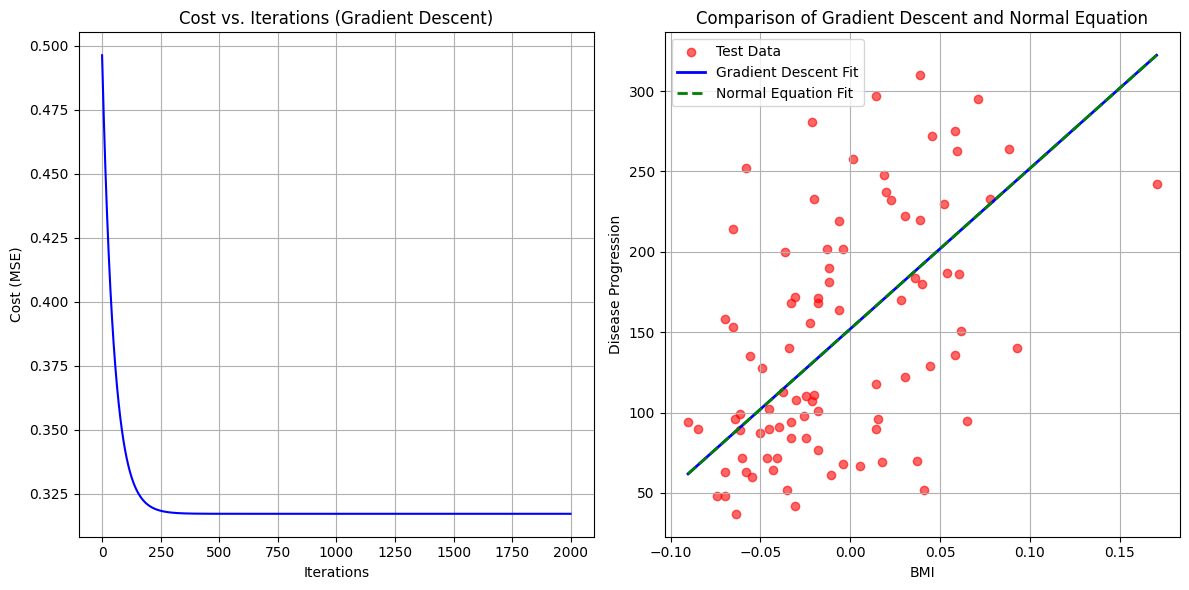

In [6]:
if __name__ == "__main__":
    main()